# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
from math import factorial
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



No se encuentra ningun problema en esta tabla, los datos se muestran correctos y los tipos de datos para cada columna son adecuados

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:


print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


La columna con las fechas de suscripción no cuenta con el tipo de dato correspondiente, tendría que ser de tipo datetime, igualmente hay datos NaN en la columna de churn_date.
En este caso para poder solucionarlo se necesita cambiar el tipo de dato de reg_date utilizando el método to_datetime y reemplazar los valores NaN con el método fillna

### Corregir los datos

In [7]:
#Se realiza la corrección del tipo de dato y se rellena la columna churn date con unknown ya que no se conoce ese dato
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d')
df_users['churn_date'] = df_users['churn_date'].fillna('Unknown')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [8]:
#Se genera una nueva columna para almacenar solo el número de mes
df_users['month'] = df_users['reg_date'].dt.month


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas

print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


La columna de call_date no cuenta con el tipo de dato apropiado ya que debería ser tipo datetime, para ello se debe cambiar el tipo de dato con el método de pandas to_datetime

### Corregir los datos

In [11]:
#Se cambia el tipo de dato para la columna call date y se cambia nombre a la columna de ID para poder identificarlo más rapidamente
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')

df_calls = df_calls.rename(columns = {'id' : 'call_id'})

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [12]:
#Se genera columna para almacenar el número de mes por usuario
df_calls['month'] = df_calls['call_date'].dt.month

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


El tipo de dato de la columna message_date no es el apropiado, debe ser tipo datetime en lugar de object, se debe cambiar el tipo con el método de pandas to_datetime

### Corregir los datos

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')
df_messages = df_messages.rename(columns = {'id' : 'message_id'})

### Enriquecer los datos

In [16]:
df_messages['month'] = df_messages['message_date'].dt.month

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Se puede observar que el tipo de datos para la columna de session_date no es el adecuado, el tipo de dato debe ser tipo datetime, para modificarlo se debe utilizar el método to_datetime de la librería pandas para realizar la conversión correspondiente

### Corregir los datos

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')
df_internet = df_internet.rename(columns = {'id' : 'session_id'})

### Enriquecer los datos

In [20]:
df_internet['month'] = df_internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario


In [22]:
# Se realiza el calculo y la agrupación para conocer la cantidad de llamadas que realizan los usuarios por mes

df_calls_users = df_users.merge(df_calls, on ="user_id")

calls_per_user = df_calls_users.groupby(['user_id', 'month_y'])['call_id'].count()

print(calls_per_user)

user_id  month_y
1000     12         16
1001     8          27
         9          49
         10         65
         11         64
                    ..
1498     12         39
1499     9          41
         10         53
         11         45
         12         65
Name: call_id, Length: 2258, dtype: int64


In [23]:
# Se realiza la agrupación y el calculo para validar el número de minutos por llamadas por mes que tuvo cada usuario

minutes_per_user = df_calls_users.groupby(['user_id', 'month_y'])['duration'].sum()

print(minutes_per_user)

user_id  month_y
1000     12         116.83
1001     8          171.14
         9          297.69
         10         374.11
         11         404.59
                     ...  
1498     12         324.77
1499     9          330.37
         10         363.28
         11         288.56
         12         468.10
Name: duration, Length: 2258, dtype: float64


In [24]:
# Se calcula el número de mensajes que envio cada usuario por mes

df_message_users = df_users.merge(df_messages, on ="user_id")

messages_per_user = df_message_users.groupby(['user_id', 'month_y'])['message_id'].count()

print(messages_per_user)

user_id  month_y
1000     12         11
1001     8          30
         9          44
         10         53
         11         36
                    ..
1496     9          21
         10         18
         11         13
         12         11
1497     12         50
Name: message_id, Length: 1806, dtype: int64


In [25]:
# Se calcula el número de mb que utilizaron los usuarios por mes

df_internet_users = df_users.merge(df_internet, on = "user_id")
#print(df_internet_users)

mb_per_user = df_internet_users.groupby(['user_id', 'month_y'])['mb_used'].sum()

print(mb_per_user)

user_id  month_y
1000     12          1901.47
1001     8           6919.15
         9          13314.82
         10         22330.49
         11         18504.30
                      ...   
1498     12         23137.69
1499     9          12984.76
         10         19492.43
         11         16813.83
         12         22059.21
Name: mb_used, Length: 2277, dtype: float64


In [26]:
# Se combinan los datos previos por medio de la funcion concat para tener toda la información en conjunto

df_information = pd.concat([calls_per_user, minutes_per_user, messages_per_user, mb_per_user], axis="columns").reset_index()



In [27]:
# Se añaden las tarifas de los planes 

plan_per_user = df_users[['user_id', 'plan']]

df_information = df_information.merge(plan_per_user, on='user_id')


In [28]:
#Se modifican los nombres de las columnas para mejorar la visualización de los datos y facilitar el trabajar con ellos, igualmente se rellenan los datos nulos
new_columns = {"month_y" : "month","call_id" : "total_calls", "duration" : "total_minutes", "message_id" : "total_messages", "mb_used" : "total_mb", "plan" : "plan_name"}

df_information = df_information.rename(columns = new_columns)

df_information = df_information.fillna(0)



In [29]:
# Se calcula el ingreso que se obtuvo por cada usuario 

df_user_income = df_information.merge(df_plans, on="plan_name", how='left')

df_user_income['minutes_income'] = df_user_income['total_minutes'] - df_user_income['minutes_included']
df_user_income['minutes_income'] = (df_user_income['minutes_income'].apply(lambda x: max(x,0)) * df_user_income['usd_per_minute'])

df_user_income['messages_income'] = df_user_income['total_messages'] - df_user_income['messages_included']
df_user_income['messages_income'] = (df_user_income['messages_income'].apply(lambda x: max(x,0)) * df_user_income['usd_per_message'])

df_user_income['internet_income'] = df_user_income['total_mb'] - df_user_income['mb_per_month_included']
df_user_income['internet_income'] = ((df_user_income['internet_income'].apply(lambda x: max(x,0)) / 1024).round()) * df_user_income['usd_per_gb']

df_user_income['total_income'] = (df_user_income['minutes_income'] + df_user_income['messages_income'] + df_user_income['internet_income']) + df_user_income['usd_monthly_pay']

print(df_user_income)

      user_id  month  total_calls  total_minutes  total_messages  total_mb  \
0        1000     12         16.0         116.83            11.0   1901.47   
1        1001      8         27.0         171.14            30.0   6919.15   
2        1001      9         49.0         297.69            44.0  13314.82   
3        1001     10         65.0         374.11            53.0  22330.49   
4        1001     11         64.0         404.59            36.0  18504.30   
...       ...    ...          ...            ...             ...       ...   
2288     1498     12         39.0         324.77             0.0  23137.69   
2289     1499      9         41.0         330.37             0.0  12984.76   
2290     1499     10         53.0         363.28             0.0  19492.43   
2291     1499     11         45.0         288.56             0.0  16813.83   
2292     1499     12         65.0         468.10             0.0  22059.21   

     plan_name  messages_included  mb_per_month_included  minut

In [30]:
#Se añade la columna de city para realizar un analisis sobre las areas
df_country_user = df_users[['user_id', 'city']]

df_user_income = df_user_income.merge(df_country_user, on="user_id")



## Estudia el comportamiento de usuario

### Llamadas

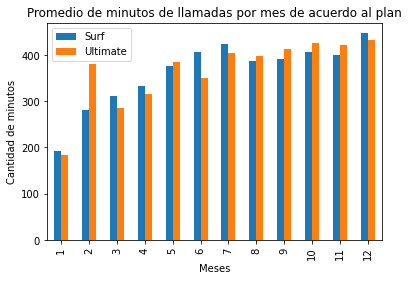

In [31]:
#Se divide el dataset en dos diferentes por medio del plan
surf_plan = df_user_income[df_user_income['plan_name'] == 'surf']
ultimate_plan = df_user_income[df_user_income['plan_name'] == 'ultimate']

#Se obtiene el promedio para los minutos de llamadas por cada uno de los planes

surf_mean = surf_plan.groupby(['month', 'plan_name'])['total_minutes'].mean().reset_index()
ultimate_mean = ultimate_plan.groupby(['month', 'plan_name'])['total_minutes'].mean().reset_index()

#Se combinan ambos datasets y se modifican los nombres de las columnas 
calls_per_month = surf_mean.merge(ultimate_mean, on='month', how='left')
columns_names = {"plan_name_x":"surf_plan", "total_minutes_x":"surf_calls_duration","plan_name_y":"ultimate_plan","total_minutes_y":"ultimate_calls_duration"}
calls_per_month = calls_per_month.rename(columns=columns_names)

#Se realiza la grafica
calls_per_month.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de minutos',
    title='Promedio de minutos de llamadas por mes de acuerdo al plan'
)
plt.legend(['Surf','Ultimate'])
plt.show()

<AxesSubplot:xlabel='total_minutes', ylabel='Count'>

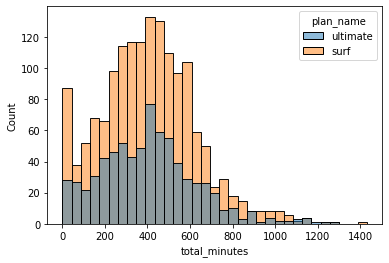

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

sns.histplot(data = df_user_income, x='total_minutes', hue='plan_name')

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.

df_user_income.groupby('plan_name').agg({'total_minutes':['mean','var']})

total_minutes              
                   mean           var
plan_name                            
surf         404.762390  49135.104891
ultimate     406.193083  51640.971402

<AxesSubplot:title={'center':'total_minutes'}, xlabel='plan_name'>

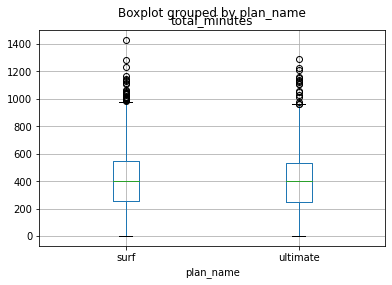

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

df_user_income.boxplot(column='total_minutes', by='plan_name')

De acuerdo a la información filtrada y mostrada se puede validar que los usuarios del plan de surf tienden a utilizar más sus minutos de llamadas que los usuarios del plan ultimate

### Mensajes

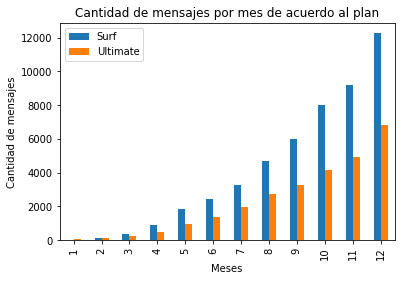

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_message = surf_plan.groupby(['month', 'plan_name'])['total_messages'].sum().reset_index()
ultimate_message = ultimate_plan.groupby(['month', 'plan_name'])['total_messages'].sum().reset_index()

#print(surf_message)
#print(ultimate_message)
messages_per_month = surf_message.merge(ultimate_message, on='month', how='left')

#print(messages_per_month)
columns_names = {"plan_name_x":"surf_plan", "total_messages_x":"surf_total_messages","plan_name_y":"ultimate_plan","total_messages_y":"ultimate_total_messages"}
messages_per_month = messages_per_month.rename(columns=columns_names)

messages_per_month.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de mensajes',
    title='Cantidad de mensajes por mes de acuerdo al plan'
)
plt.legend(['Surf','Ultimate'])
plt.show()

<AxesSubplot:xlabel='total_messages', ylabel='Count'>

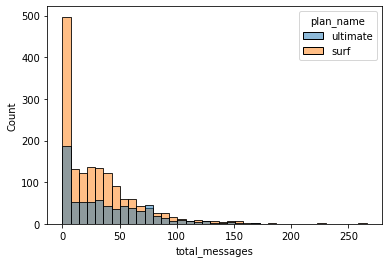

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

sns.histplot(data = df_user_income, x='total_messages', hue='plan_name')

In [37]:
df_user_income.groupby('plan_name').agg({'total_messages':['mean','var']})

total_messages             
                    mean          var
plan_name                            
surf           31.159568  1126.724522
ultimate       37.551389  1208.756744

<AxesSubplot:title={'center':'total_messages'}, xlabel='plan_name'>

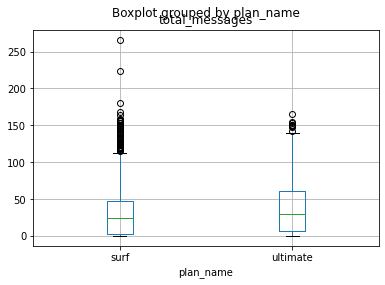

In [38]:
df_user_income.boxplot(column='total_messages', by='plan_name')

Los usuarios igualmente tienden a utilizar más mensajes dentro del plan Surf que dentro del plan ultimate, habiendo una gran diferencia y cantidad de datos lejanos a la media

### Internet

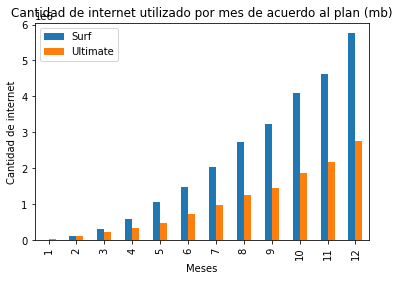

In [39]:
surf_internet = surf_plan.groupby(['month', 'plan_name'])['total_mb'].sum().reset_index()
ultimate_internet = ultimate_plan.groupby(['month', 'plan_name'])['total_mb'].sum().reset_index()

internet_per_month = surf_internet.merge(ultimate_internet, on='month', how='left')

columns_names = {"plan_name_x":"surf_plan", "total_mb_x":"surf_total_mb","plan_name_y":"ultimate_plan","total_mb_y":"ultimate_total_mb"}
internet_per_month = internet_per_month.rename(columns=columns_names)

internet_per_month.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de internet',
    title="Cantidad de internet utilizado por mes de acuerdo al plan (mb)"
)
plt.legend(['Surf','Ultimate'])
plt.show()

<AxesSubplot:xlabel='total_mb', ylabel='Count'>

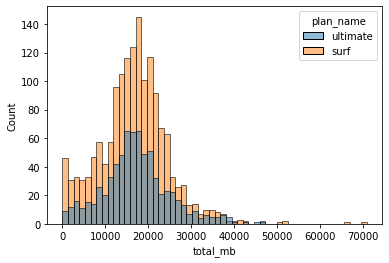

In [40]:
sns.histplot(data = df_user_income, x='total_mb', hue='plan_name')

In [41]:
df_user_income.groupby('plan_name').agg({'total_mb':['mean','var']})

total_mb              
                   mean           var
plan_name                            
surf       16558.283490  6.421640e+07
ultimate   17214.699694  6.165229e+07

<AxesSubplot:title={'center':'total_mb'}, xlabel='plan_name'>

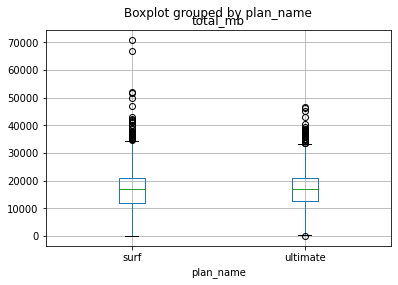

In [42]:
df_user_income.boxplot(column='total_mb', by='plan_name')


Los usuarios dentro del plan surf tienen a usar más datos de internet que los usuarios que tienen el plan ultimate siendo los usuarios del plan surf quienes superan más los límites gratuitos del plan

## Ingreso

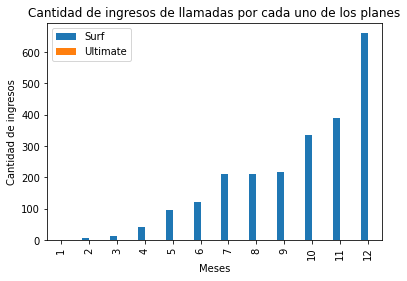

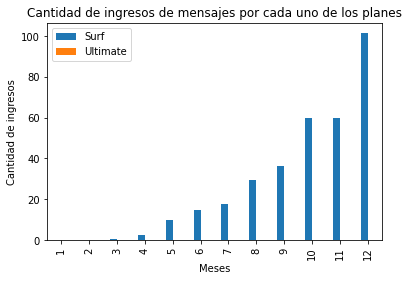

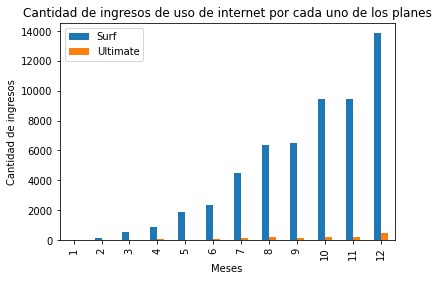

In [43]:
surf_calls_income = surf_plan.groupby(['month', 'plan_name'])['minutes_income'].sum().reset_index()
ultimate_calls_income = ultimate_plan.groupby(['month', 'plan_name'])['minutes_income'].sum().reset_index()

surf_messages_income = surf_plan.groupby(['month', 'plan_name'])['messages_income'].sum().reset_index()
ultimate_messages_income = ultimate_plan.groupby(['month', 'plan_name'])['messages_income'].sum().reset_index()

surf_internet_income = surf_plan.groupby(['month', 'plan_name'])['internet_income'].sum().reset_index()
ultimate_internet_income = ultimate_plan.groupby(['month', 'plan_name'])['internet_income'].sum().reset_index()


income_per_month_calls = surf_calls_income.merge(ultimate_calls_income, on='month', how='left')

income_per_month_messages = surf_messages_income.merge(ultimate_messages_income, on='month', how='left')

income_per_month_internet = surf_internet_income.merge(ultimate_internet_income, on='month', how='left')


columns_names_calls = {"plan_name_x":"surf_plan", "minutes_income_x":"surf_calls_income","plan_name_y":"ultimate_plan","minutes_income_y":"ultimate_income_calls"}
columns_names_messages = {"plan_name_x":"surf_plan", "messages_income_x":"surf_messages_income","plan_name_y":"ultimate_plan","messages_income_y":"ultimate_income_messages"}
columns_names_internet = {"plan_name_x":"surf_plan", "internet_income_x":"surf_income_internet","plan_name_y":"ultimate_plan","internet_income_y":"ultimate_income_internet"}

income_per_month_calls = income_per_month_calls.rename(columns=columns_names_calls)
income_per_month_messages = income_per_month_messages.rename(columns=columns_names_messages)
income_per_month_internet = income_per_month_internet.rename(columns=columns_names_internet)

income_per_month_calls.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de ingresos',
    title="Cantidad de ingresos de llamadas por cada uno de los planes"
)
plt.legend(['Surf','Ultimate'])
plt.show()

income_per_month_messages.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de ingresos',
    title="Cantidad de ingresos de mensajes por cada uno de los planes"
)
plt.legend(['Surf','Ultimate'])
plt.show()
income_per_month_internet.plot(
    kind='bar',
    x='month',
    xlabel='Meses',
    ylabel='Cantidad de ingresos',
    title="Cantidad de ingresos de uso de internet por cada uno de los planes"
)
plt.legend(['Surf','Ultimate'])
plt.show()

<AxesSubplot:xlabel='minutes_income', ylabel='Count'>

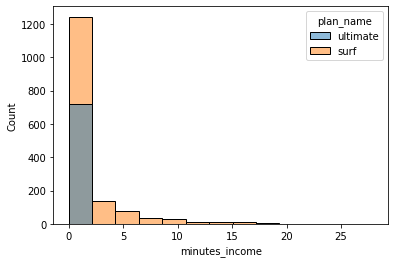

In [44]:

sns.histplot(data = df_user_income, x='minutes_income', hue='plan_name')

<AxesSubplot:xlabel='messages_income', ylabel='Count'>

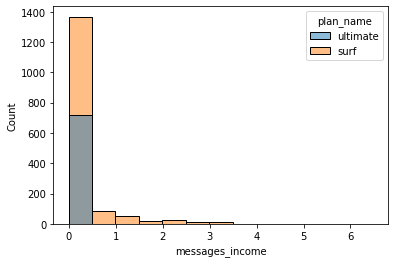

In [45]:
sns.histplot(data = df_user_income, x='messages_income', hue='plan_name')

<AxesSubplot:xlabel='internet_income', ylabel='Count'>

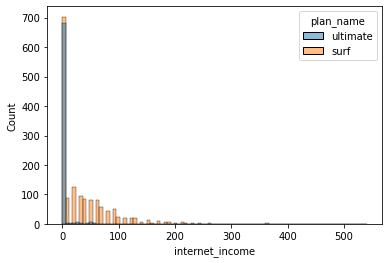

In [46]:
sns.histplot(data = df_user_income, x='internet_income', hue='plan_name')

<AxesSubplot:title={'center':'minutes_income'}, xlabel='plan_name'>

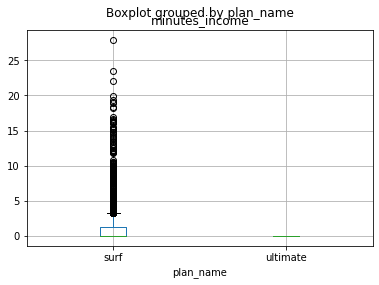

In [47]:
df_user_income.boxplot(column='minutes_income', by='plan_name')

<AxesSubplot:title={'center':'messages_income'}, xlabel='plan_name'>

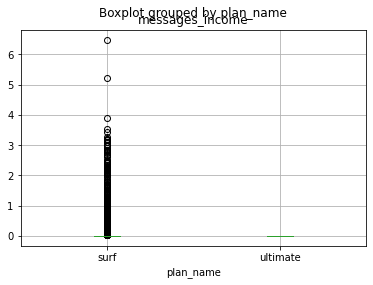

In [48]:
df_user_income.boxplot(column='messages_income', by='plan_name')

<AxesSubplot:title={'center':'internet_income'}, xlabel='plan_name'>

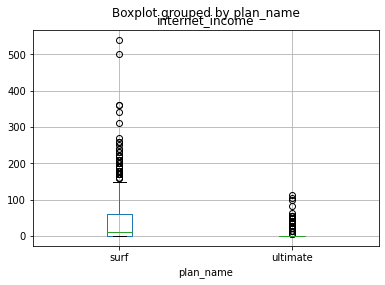

In [49]:
df_user_income.boxplot(column='internet_income', by='plan_name')



Los usuarios del plan surf son quienes generan ingresos más grandes superando los límites de su plan y teniendo que pagar cargos extras por cada llamada, mensaje o gb superado.

## Prueba las hipótesis estadísticas

In [50]:
# Prueba las hipótesis
print("La hipótesis nula sugiere que no hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de las tarifas Ultimate y Surf.")
print("La hipótesis alternativa sugiere que hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de las tarifas Ultimate y Surf.")

df_surf = df_user_income[df_user_income['plan_name'] == 'surf']['total_income']
df_ultimate = df_user_income[df_user_income['plan_name'] == 'ultimate']['total_income']

result = stats.ttest_ind(df_surf, df_ultimate, equal_var=False, alternative='two-sided')

print("Valor p:", result.pvalue)

alpha = 0.05

if(result.pvalue < alpha):
    print("Rechazamos la hipotesis nula")
else:
    print("No se puede rechazar la hipotesis nula")

La hipótesis nula sugiere que no hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de las tarifas Ultimate y Surf.
La hipótesis alternativa sugiere que hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de las tarifas Ultimate y Surf.
Valor p: 2.274545558396869e-25
Rechazamos la hipotesis nula


In [51]:
# Prueba las hipótesis
print("La hipótesis nula establece que no hay diferencia significativa en el ingreso promedio entre los usuarios en el área de Nueva York-Nueva Jersey y los usuarios en otras regiones.")
print("La hipótesis alternativa sugiere que hay una diferencia significativa en el ingreso promedio entre los usuarios en el área de Nueva York-Nueva Jersey y los usuarios en otras regiones.")

print("")
df_njny_users = df_user_income[df_user_income['city'].str.contains("NY-NJ")]['total_income']

df_other_users = df_user_income[~df_user_income['city'].str.contains("NY-NJ")]['total_income']

result = stats.ttest_ind(df_njny_users, df_other_users, equal_var=False, alternative='two-sided')

print("El valor p es: ", result.pvalue)

if(result.pvalue < alpha):
    print("Se rechaza la hipotesis")
else:
    print("No se puede rechazar la hipotesis")


La hipótesis nula establece que no hay diferencia significativa en el ingreso promedio entre los usuarios en el área de Nueva York-Nueva Jersey y los usuarios en otras regiones.
La hipótesis alternativa sugiere que hay una diferencia significativa en el ingreso promedio entre los usuarios en el área de Nueva York-Nueva Jersey y los usuarios en otras regiones.

El valor p es:  0.01883167260438131
Se rechaza la hipotesis


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
¿En este caso qué podría faltar en este apartado?
</div>

## Conclusión general


1.- Se valida que los usuarios dentro del plan surf tienen a ser quienes generan más ingresos superando el límite gratuito que les proporciona su plan
2.- Se tuvo que unificar toda la información de los usuarios con los datos relevantes referentes a su plan, cargos extras, total de consumo y el limite gratuito del plan, esto facilitó el analisis y el filtrado de la información.
Se optó por realizar pruebas 
3.- Para probar las hipotesis se realizó con pruebas de dos colas ya que nos interesa saber la diferencia entre ambos grupos de población, en este caso los usuarios de planes surf y ultimate así como de un área u otra.
4.- Es imporante poder realizar la agrupación de datos específicos de acuerdo al análisis que se necesita realizar